## Network Europe Road
Saya akan menganalisis network road yang melintasi eropa. Jaringan ini terdiri dari node, yang mewakili kota dan edge yang mewakili jalan yang menghubungkan kota-kota. Saya akan menggunakan 1 dataset network yang disediakan dari website networkrepository.com. Network road-euroroad ini memiliki 1174 node dan 1417 edge. Data network ini saya ambil dan gunakan dari raw data yang sudah siap untuk digunakan.

Sumber data : https://networkrepository.com/road-euroroad.php

Node = Kota
Edge = Jalan

# Install Dependencies

In [101]:
%pip install networkx

In [102]:
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [103]:
%pip install numpy

Note: you may need to restart the kernel to use updated packages.


# Load data network Europe Road

In [104]:
import networkx as nx
import matplotlib.pyplot as plt

# Read file .edges
file_path = "road-euroroad.edges"

# make a graph network and add 1174 nodes
G = nx.Graph()
G.add_nodes_from(range(1, 1175))

edges = []
with open(file_path, 'r') as f:
    for line in f:
        if line.startswith('%'):
            continue  # Ignore comments
        else:
            parts = line.split()
            node1 = int(parts[0])
            node2 = int(parts[1])
            # Add edge to the graph
            G.add_edge(node1, node2)

# Calculate degree for each node
degree_dict = dict(G.degree())

# Sort nodes by degree in descending order
sorted_nodes = sorted(degree_dict.items(), key=lambda x: x[1], reverse=True)

# Select top 10 nodes with the largest degree 
top_n_nodes = [node for node, degree in sorted_nodes[:10]]

# Show Graph Properties
print("Nodes :", len(G.nodes))
print("Edges :", len(G.edges))

Nodes : 1174
Edges : 1417


# Visualize the network

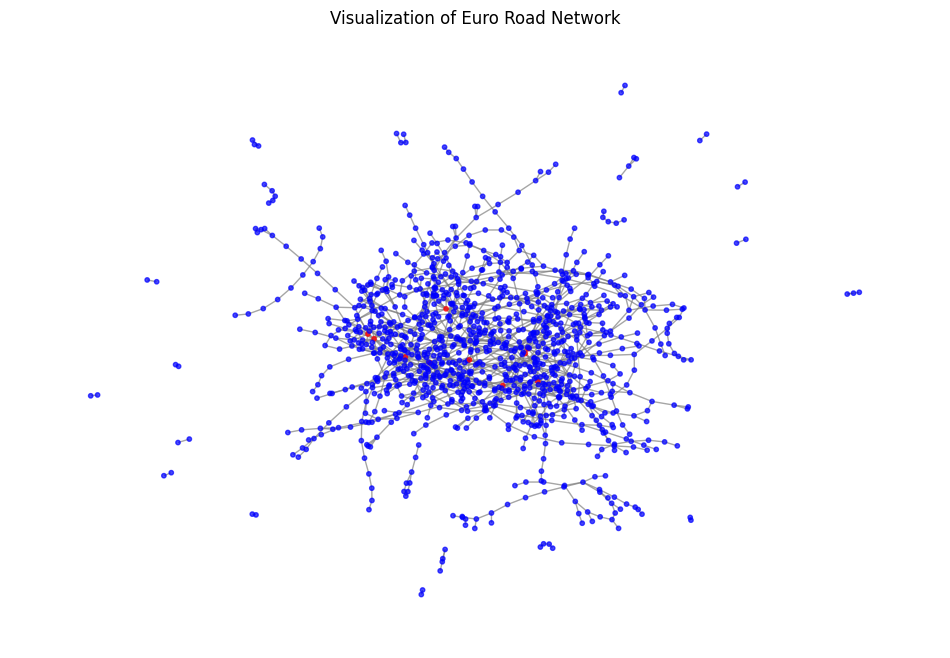

In [105]:
fig, ax = plt.subplots(figsize=(12, 8))

# Use a spring layout for the graph
pos = nx.spring_layout(G)

# Color for nodes that have biggest degree
node_colors = ['red' if node in top_n_nodes else 'blue' for node in G.nodes()]

# Draw the graph
nx.draw(G, pos, ax=ax, node_size=10, edge_color='gray', alpha=0.7, with_labels=False, node_color=node_colors)

# Set up zoom and pan functionality
def on_scroll(event):
    # Zoom in or out
    base_scale = 1.2
    if event.button == 'up':  # Scroll up
        scale_factor = 1 / base_scale
    elif event.button == 'down':  # Scroll down
        scale_factor = base_scale
    else:
        return

    cur_xlim = ax.get_xlim()
    cur_ylim = ax.get_ylim()
    xdata = event.xdata  # Get mouse x position
    ydata = event.ydata  # Get mouse y position

    # Calculate new limits
    new_width = (cur_xlim[1] - cur_xlim[0]) * scale_factor
    new_height = (cur_ylim[1] - cur_ylim[0]) * scale_factor
    relx = (cur_xlim[1] - xdata) / (cur_xlim[1] - cur_xlim[0])
    rely = (cur_ylim[1] - ydata) / (cur_ylim[1] - cur_ylim[0])

    ax.set_xlim([xdata - new_width * (1 - relx), xdata + new_width * relx])
    ax.set_ylim([ydata - new_height * (1 - rely), ydata + new_height * rely])
    ax.figure.canvas.draw()

# Connect the event
fig.canvas.mpl_connect('scroll_event', on_scroll)

plt.title("Visualization of Euro Road Network")
plt.show()

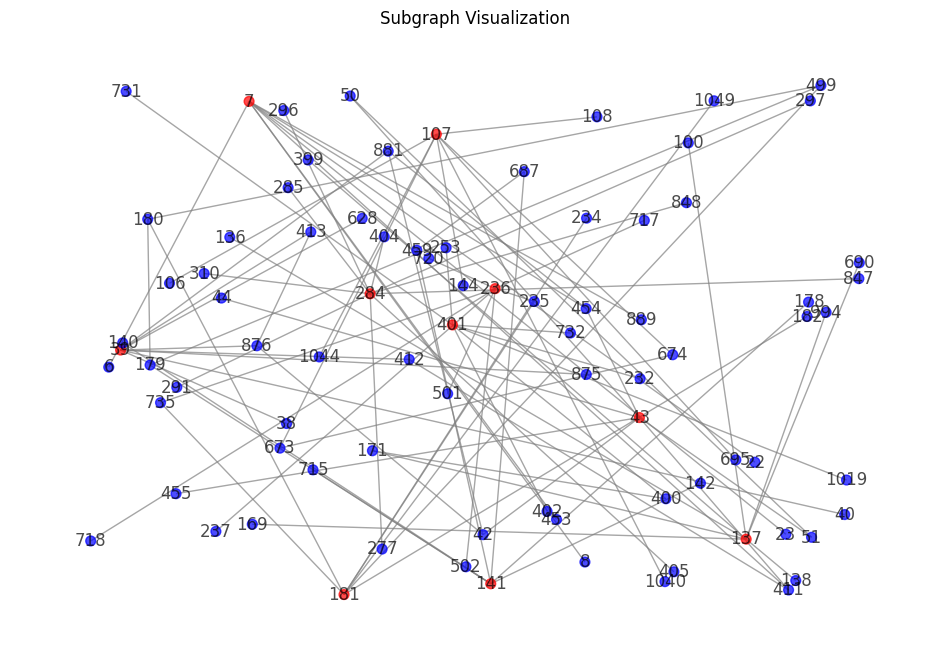

In [106]:
# Add Neighbor from top 10 nodes with the largest degree 
neighbor_nodes = []
subgraph = G.subgraph(top_n_nodes)
for sub_node in subgraph:
    nodes = list(G.neighbors(sub_node))
    for node in nodes:
        neighbor_nodes.append(node)
    neighbor_nodes.append(sub_node)
G_neighbor = G.subgraph(neighbor_nodes)

node_colors_subgraph = ['red' if node in top_n_nodes else 'blue' for node in G_neighbor.nodes()]

# Visualization subgraph
fig, ax = plt.subplots(figsize=(12, 8))
pos = nx.random_layout(G_neighbor)
nx.draw(G_neighbor, pos, ax=ax, node_size=50, edge_color='gray', alpha=0.7, with_labels=True, node_color=node_colors_subgraph)
plt.title("Subgraph Visualization")
plt.show()

# Centrality Measures

In [107]:
# Centrality Measures
degree_centrality = nx.degree_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)
closeness_centrality = nx.closeness_centrality(G)
eigen_centrality = nx.eigenvector_centrality(G, max_iter=1000)
pagerank = nx.pagerank(G)


In [108]:
# Sort the degree centrality items and print the first 5 items
degree_centrality_top_5 = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:5]
print("Top 5 Degree Centrality:")
for node in degree_centrality_top_5:
    print(node)
print("\n")

# Sort the betweenness centrality items and print the first 5 items
betweenness_centrality_top_5 = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)[:5]
print("Top 5 Betweenness Centrality:")
for node in betweenness_centrality_top_5:
    print(node)
print("\n")

# Sort the closeness centrality items and print the first 5 items
closeness_centrality_top_5 = sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)[:5]
print("Top 5 Closeness Centrality:")
for node in closeness_centrality_top_5:
    print(node)
print("\n")

# Sort the eigen centrality items and print the first 5 items
eigen_centrality_top_5 = sorted(eigen_centrality.items(), key=lambda x: x[1], reverse=True)[:5]
print("Top 5 Eigen Centrality:")
for node in eigen_centrality_top_5:
    print(node)
print("\n")

# Sort the pagerank items and print the first 5 items
pagerank_top_5 = sorted(pagerank.items(), key=lambda x: x[1], reverse=True)[:5]
print("Top 5 Pagerank:")
for node in pagerank_top_5:
    print(node)
print("\n")

Top 5 Degree Centrality:
(284, 0.008525149190110827)
(7, 0.0068201193520886615)
(39, 0.0068201193520886615)
(107, 0.0068201193520886615)
(137, 0.0068201193520886615)


Top 5 Betweenness Centrality:
(402, 0.21479429687683194)
(284, 0.21251520234235022)
(277, 0.19546510853156437)
(453, 0.17511179543874272)
(452, 0.1743658370816371)


Top 5 Closeness Centrality:
(401, 0.076865027983178)
(402, 0.07677508228008835)
(403, 0.07539498353434926)
(432, 0.07408752092264696)
(1019, 0.0740337780606897)


Top 5 Eigen Centrality:
(7, 0.3651165169806081)
(43, 0.3002241061798406)
(454, 0.28075723588762486)
(411, 0.2362520019996283)
(39, 0.20596898399503158)


Top 5 Pagerank:
(284, 0.002887136081923523)
(137, 0.0021572665659909274)
(236, 0.0021229270510711)
(39, 0.0020671846837229642)
(107, 0.0020069427026081542)




### Analisis centrality measures :
Degree Centrality:
Node 284 memiliki degree centrality tertinggi (0.0085). Ini berarti node ini memiliki koneksi langsung dengan lebih banyak node dibandingkan dengan yang lain.

Betweenness Centrality:
Node 402 memiliki nilai betweenness tertinggi (0.2148). Ini menunjukkan bahwa node ini sering menjadi perantara dalam jalur terpendek antar node lainnya, menjadikannya "jembatan" untuk graph besar.

Closeness Centrality:
Node 401 memiliki closeness tertinggi (0.0769). Node ini berada paling dekat (secara rata-rata) ke semua node lain dalam hal jarak jaringan.

Eigenvector Centrality:
Node 7 memiliki eigenvector tertinggi (0.3651). Ini berarti node 7 terhubung ke banyak node yang juga penting, menunjukkan pengaruh yang lebih luas dalam jaringan.

PageRank:
Node 284 memiliki nilai PageRank tertinggi (0.0028). Ini menunjukkan bahwa node tersebut sering dikunjungi dalam konteks jaringan

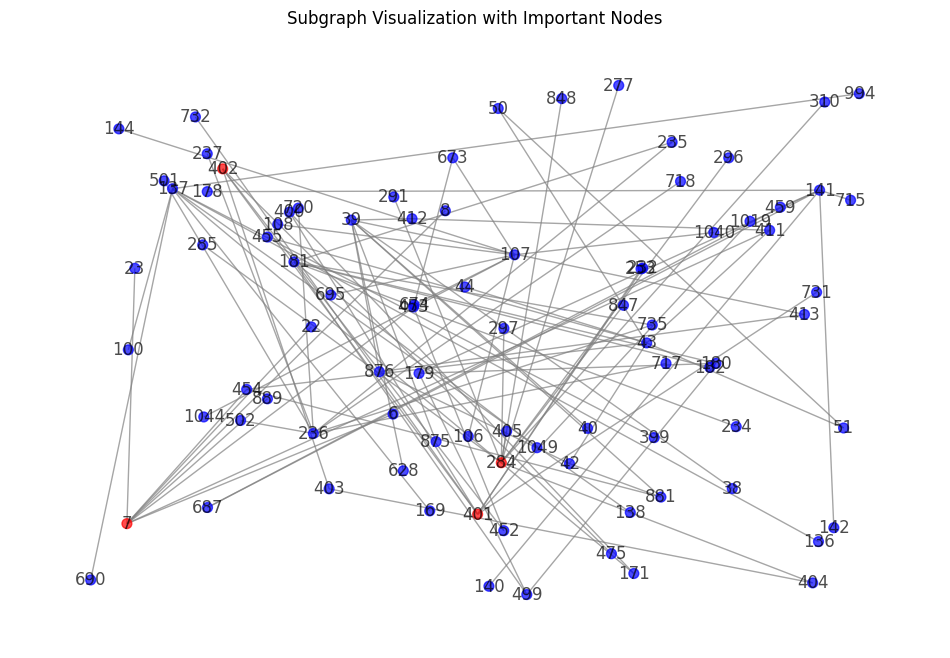

In [109]:
important_nodes = [284, 402, 401, 7]

neighbor_402 = list(G.neighbors(402))
for node in neighbor_402:
    neighbor_nodes.append(node)

G_important = G.subgraph(neighbor_nodes)

node_colors_important = ['red' if node in important_nodes else 'blue' for node in G_important.nodes()]

# Visualization subgraph
fig, ax = plt.subplots(figsize=(12, 8))
pos = nx.random_layout(G_important)
nx.draw(G_important, pos, ax=ax, node_size=50, edge_color='gray', alpha=0.7, with_labels=True, node_color=node_colors_important)
plt.title("Subgraph Visualization with Important Nodes")
plt.show()

# Average Degree & Degree Distribution

Average Degree: 2.41396933560477


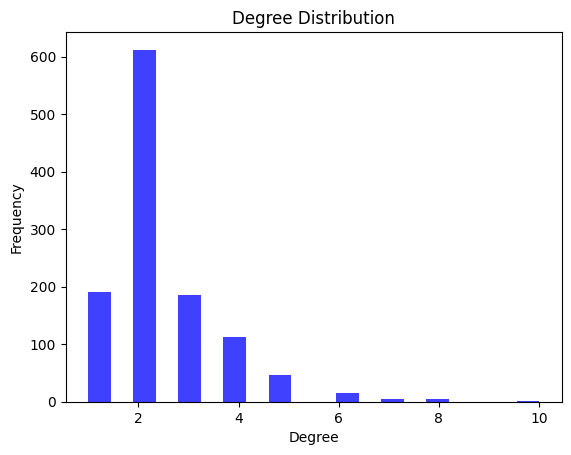

In [110]:
# Average Degree
average_degree = sum(dict(G.degree()).values()) / G.number_of_nodes()
print("Average Degree:", average_degree)

# Plot Histogram of Degree Distribution
degree_sequence = [len(list(G.neighbors(n))) for n in G.nodes()]
plt.hist(degree_sequence, bins=20, alpha=0.75, color='blue')
plt.title("Degree Distribution")
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.show()


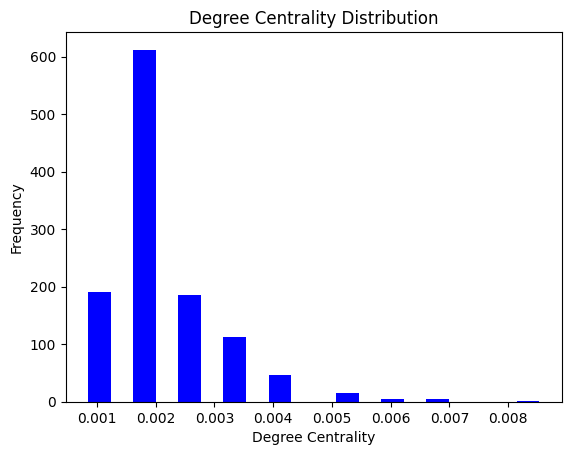

In [111]:
# Plot Histogram of Degree Centrality Distribution
plt.hist(list(degree_centrality.values()), bins=20, color='blue')
plt.title("Degree Centrality Distribution")
plt.xlabel("Degree Centrality")
plt.ylabel("Frequency")
plt.show()

### Analisis Degree Distribution

Rata-rata degree adalah sekitar 2 

Sebagian besar node memiliki degree kecil, yaitu 2. dalam konteks network Europe road, terdapat mayoritas kota kecil

Node yang memiliki degree besar sedikit. Dalam konteks network Europe road, hanya beberapa kota yang menjadi kota besar ataupun pusat.

# Clustering Coefficient

In [112]:
clustering_coefficients = nx.clustering(G)
nodes_with_clustering = {node: coeff for node, coeff in clustering_coefficients.items() if coeff > 0}
nodes_with_clustering = sorted(nodes_with_clustering.items(), key=lambda x: x[1], reverse=True)
for node in nodes_with_clustering:
    print(node)

average_clustering = nx.average_clustering(G)
print("Average Clustering Coefficient:", average_clustering)

(157, 1.0)
(205, 1.0)
(463, 1.0)
(544, 1.0)
(700, 1.0)
(50, 0.3333333333333333)
(120, 0.3333333333333333)
(121, 0.3333333333333333)
(156, 0.3333333333333333)
(179, 0.3333333333333333)
(187, 0.3333333333333333)
(192, 0.3333333333333333)
(193, 0.3333333333333333)
(195, 0.3333333333333333)
(338, 0.3333333333333333)
(434, 0.3333333333333333)
(478, 0.3333333333333333)
(497, 0.3333333333333333)
(541, 0.3333333333333333)
(542, 0.3333333333333333)
(576, 0.3333333333333333)
(673, 0.3333333333333333)
(699, 0.3333333333333333)
(732, 0.3333333333333333)
(950, 0.3333333333333333)
(954, 0.3333333333333333)
(1145, 0.3333333333333333)
(9, 0.2)
(143, 0.2)
(194, 0.2)
(545, 0.2)
(561, 0.2)
(10, 0.16666666666666666)
(49, 0.16666666666666666)
(57, 0.16666666666666666)
(64, 0.16666666666666666)
(186, 0.16666666666666666)
(337, 0.16666666666666666)
(394, 0.16666666666666666)
(413, 0.16666666666666666)
(428, 0.16666666666666666)
(429, 0.16666666666666666)
(433, 0.16666666666666666)
(439, 0.16666666666666666)


### Analisis Clustering Coefficient

Node dengan CC tinggi dalam konteks jaringan europe road ini adalah kota dengan banyak jalur alternatif antar kota di sekitarnya sehingga membentuk suatu cluster local.

Node dengan CC = 0 artinya tetangga dari node tersebut tidak saling terhubung. Dalam konteks jaringan europe road ini, Kota ini hanya berfungsi sebagai penghubung langsung ke kota lain, tanpa adanya koneksi langsung antara kota-kota tetangga yang terhubung ke node tersebut. Seringkali node dengan betweenness yang tinggi memiliki CC yang rendah contohnya node 402.

# Diameter & Average Path Length

In [113]:
# Diameter and Average Path Length
if nx.is_connected(G):
    diameter = nx.diameter(G)
    avg_path_length = nx.average_shortest_path_length(G)
    print("Diameter:", diameter)
    print("Average Path Length:", avg_path_length)
else:
    print("Graph is not connected; diameter and average path length are undefined.")



Graph is not connected; diameter and average path length are undefined.


In [114]:
connected_components = list(nx.connected_components(G))
print(f"Number of connected components: {len(connected_components)}")
giant_component = max(connected_components, key=len)
print(f"Size of largest connected component: {len(giant_component)}")

Number of connected components: 26
Size of largest connected component: 1039


In [115]:
G_gc = G.subgraph(giant_component).copy()

diameter = nx.diameter(G_gc)
avg_path_length = nx.average_shortest_path_length(G_gc)
print(f"Diameter of LCC: {diameter}")
print(f"Average Path Length of LCC: {avg_path_length}")

Diameter of LCC: 62
Average Path Length of LCC: 18.39514614059391


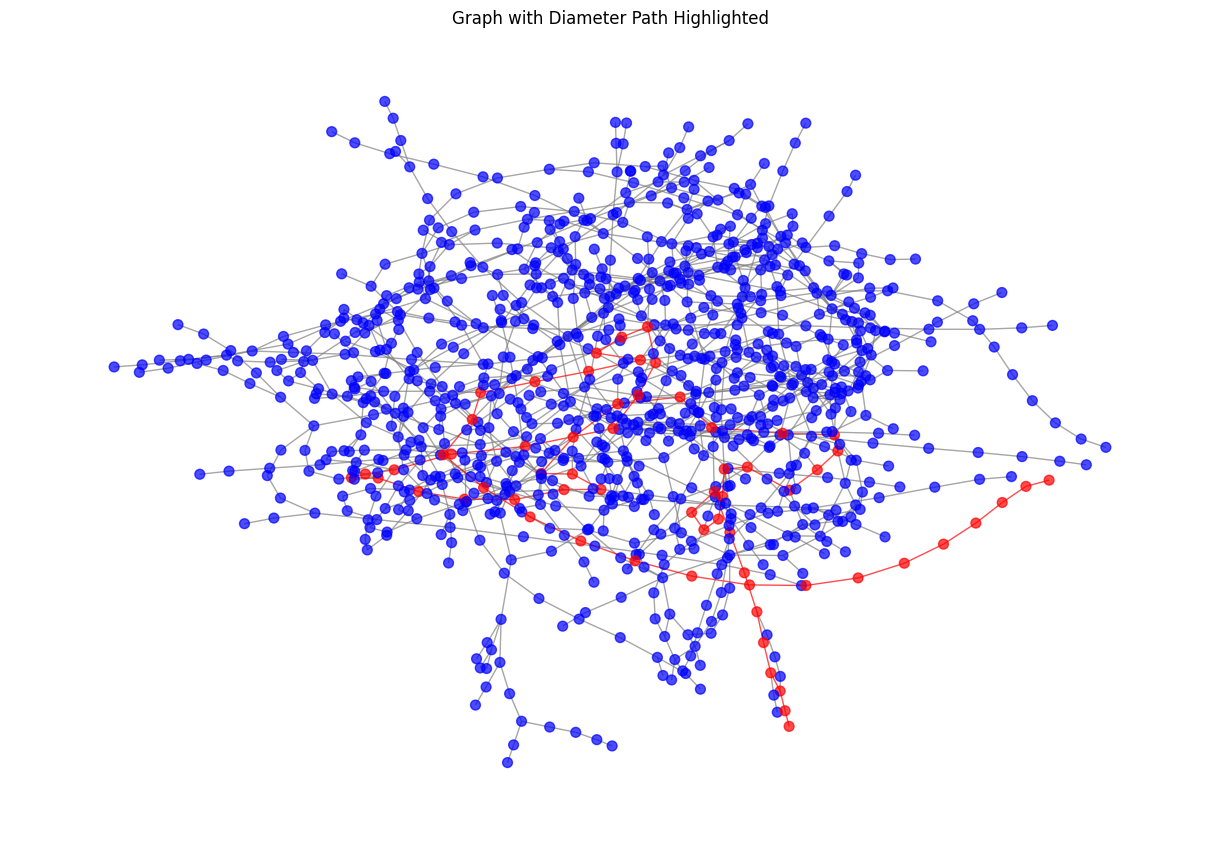

In [116]:
# Collect all pairs shortest path lengths
path_lengths = dict(nx.all_pairs_shortest_path_length(G_gc))

# Find pairs of node that have length same as diameter
diameter_pair = None

for source, lengths in path_lengths.items():
    for target, length in lengths.items():
        if length == diameter:
            diameter_pair = (source, target)
            break
    if diameter_pair:
        break

# Find path diameter
diameter_path = nx.shortest_path(G_gc, source=diameter_pair[0], target=diameter_pair[1])

# Visualize the graph
pos = nx.spring_layout(G_gc)
node_colors = []
edge_colors = []

for node in G_gc.nodes():
    if node in diameter_path:
        node_colors.append('red')  # Red for nodes in diameter path
    else:
        node_colors.append('blue')  # Blue for other nodes

for edge in G_gc.edges():
    if edge[0] in diameter_path and edge[1] in diameter_path and \
       abs(diameter_path.index(edge[0]) - diameter_path.index(edge[1])) == 1:
        edge_colors.append('red')  # Red for edges in diameter path
    else:
        edge_colors.append('gray')  # Gray for other edges

plt.figure(figsize=(12, 8))
nx.draw(G_gc, pos, with_labels=False, node_color=node_colors, edge_color=edge_colors, node_size=50, font_size=8, alpha=0.7)
plt.title("Graph with Diameter Path Highlighted")
plt.show()

### Analisis Diameter dan Average Path Length

Ada 26 connected component terpisah di network europe road ini. Maka dari itu tidak bisa dihitung diameter dan average path length nya secara keseluruhan graph.

Alternatif:
Mencoba menemukan Giant Component nya dan hitung diameter dan average path length nya. Asumsi giant component ini mempresentasikan sebuah provinsi dan component kecil mempresentasikan sebuah kota/desa terpencil atau diluar provinsi.

Giant Component memiliki diameter 62, berarti jarak terpanjang (jumlah edge) antara dua kota dalam Giant Component adalah 62.
Untuk Average Path Length Giant Component adalah 18.4 berarti jarak rata-rata antara dua node di dalam giant component adalah sekitar 18 edge. menunjukkan bahwa untuk sebagian besar perjalanan antar kota, jumlah kota yang harus dilewati relatif moderat dibandingkan diameter. Hal ini menunjukkan bahwa jaringan memiliki beberapa shortcut atau jalur yang lebih efisien.

# Scaling Exponent

Calculating best minimal value for power law fit
Scaling Exponent (alpha): 27.888520706347297


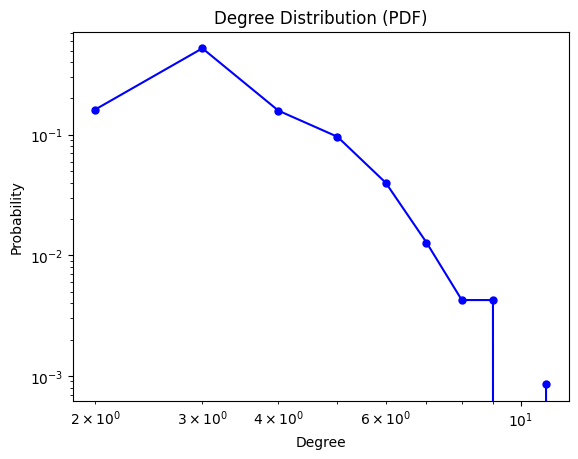

In [117]:
# scaling exponent
import powerlaw
import numpy as np

degree_sequence = [d for n, d in G.degree()]

# filter degree higher than 0
degree_sequence = [d for d in degree_sequence if d > 0]

# Fit the degree sequence with powerlaw
fit = powerlaw.Fit(degree_sequence)

# Show the alpha powerlaw
print("Scaling Exponent (alpha):", fit.power_law.alpha)


hist, bins = np.histogram(degree_sequence, bins=np.arange(1, max(degree_sequence) + 2))
pdf = hist / sum(hist)

# Plot PDF dengan log scaling pada sumbu X dan Y
plt.plot(bins[1:], pdf, 'bo-', markersize=5)

plt.yscale('log')
plt.xscale('log')
plt.xlabel('Degree')
plt.ylabel('Probability')
plt.title('Degree Distribution (PDF)')

plt.show()

### Analisis Scaling Exponent

Sebagian besar node memiliki degree rendah dan hanya ada sedikit node dengan derajat tinggi yang terhubung dengan banyak node lain. Ini adalah karakteristik dari scale-free atau power-law distribution dan 80/20 rule.

Derajat rendah memiliki probabilitas yang relatif tinggi, artinya banyak node dengan koneksi sedikit.
Derajat tinggi menunjukkan penurunan tajam dalam probabilitas, artinya ada sedikit node dengan banyak koneksi.

# Assortativity

In [118]:
# Assortativity
assortativity = nx.degree_assortativity_coefficient(G)
print("Assortativity:", assortativity)

Assortativity: 0.12668357398536234


### Analisis Assortativity

r = assorativity coefficient value

-1 < r < 1

r > 0 -> assortative

r < 0 -> disassortative

r ≈ 0 -> neutral

Assortativity coefficient network europe road ini sekitar 0.1267 yang hampir 0. Itu berarti bahwa network ini hampir tidak asortatif dan tidak dapat menghubungkan node yang terhubung berdasarkan degree node tersebut. Nilai ini cukup masuk akal, mencerminkan campuran hubungan antara kota besar dan kecil tanpa dominasi clustering di antara node dengan degree tinggi.

Value assortativity references : 

https://www.sciencedirect.com/science/article/pii/S1877050914004062 

http://cazabetremy.fr/Teaching/CN2020/CheatSheetAssortativity.pdf

# Modularity

In [119]:
from networkx.algorithms.community import greedy_modularity_communities

communities = list(greedy_modularity_communities(G))
modularity = nx.algorithms.community.quality.modularity(G, communities)
print("Modularity:", modularity)
print("Number of Communities:", len(communities))

Modularity: 0.8779693498993222
Number of Communities: 46


### Analisis Modularity

Q = modularity value

Q = 0.3 - 0.7 -> Adanya struktur komunitas yang signifikan

Q ≈ 0.8 - 1 -> Partisi komunitas jelas

Q ≈ 0 -> Tidak ada struktur komunitas yang signifikan

Q < 0 -> Partisi lebih buruk dari random network

Nilai Q ≈ 0.878 menunjukkan bahwa komunitas-komunitas dalam jaringan jelas. Dalam konteks network Europe road, ini mencerminkan adanya cluster kota-kota yang sangat saling terhubung secara internal, tetapi memiliki koneksi terbatas ke kluster lain.

Value modularity references :

https://arxiv.org/abs/cond-mat/0308217

https://arxiv.org/abs/cond-mat/0408187

http://sparkling-graph.readthedocs.io/en/latest/modularity.html#:~:text=Modularity%20measures%20strength%20of%20division,is%20not%20better%20than%20random.